## Logistic Regression Implementation

#### Summary:

- Practical implementation of Logistic regression
- Performed cross validation and found the best hyper parameters

In [1]:
## Let's use Iris dataset for classification problem

In [2]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
load_iris()

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
dataset=load_iris()

In [5]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
dataset.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [7]:
print(dataset.DESCR) # Description of the IRIS data

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [8]:
data= dataset.data

In [9]:
data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [10]:
dataset.feature_names # Independent features 

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [11]:
dataset.target_names # Depemndent feature (classes names) 

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [12]:
dataset.target # 0 represents setosa, 1 represents versicolor, 2 reprsents virginica

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
# Create a dataframe

import pandas as pd

df=pd.DataFrame(dataset.data,columns=dataset.feature_names)

In [14]:
df.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
20,5.4,3.4,1.7,0.2
7,5.0,3.4,1.5,0.2
104,6.5,3.0,5.8,2.2
93,5.0,2.3,3.3,1.0
98,5.1,2.5,3.0,1.1
140,6.7,3.1,5.6,2.4
76,6.8,2.8,4.8,1.4
91,6.1,3.0,4.6,1.4
17,5.1,3.5,1.4,0.3
47,4.6,3.2,1.4,0.2


In [15]:
df["target"]= pd.DataFrame(dataset.target) # Adding or Creating new column

# df["target"]= dataset.target # Adding or Creating new column

In [16]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [17]:
df.groupby("target").mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
0,5.006,3.428,1.462,0.246
1,5.936,2.770,4.260,1.326
2,6.588,2.974,5.552,2.026


In [18]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [19]:
df["target"].unique() # Here it is having more than 2 unique categories that means it is a multi-class clqassification

# As we are discussing the binary classification, Let's remove the class -2

array([0, 1, 2])

In [20]:
df=df[df["target"]!=2]

In [21]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [22]:
df.target.unique() # Now target variable consists of two unique classes (Binary Classification)

array([0, 1])

<Axes: xlabel='target', ylabel='sepal length (cm)'>

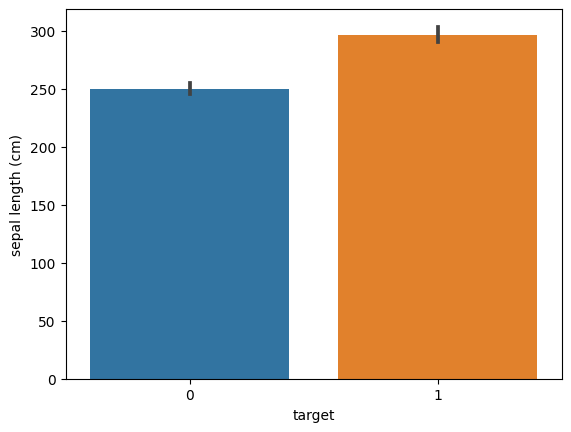

In [23]:
# plotting barplot

sns.barplot(x="target",y="sepal length (cm)",data=df,estimator=sum)

In [24]:
## Let's Create the independent and dependent features

X= df.iloc[:,:-1] # Independent features
# X= df.drop("target",axis=1) # Independent features
y= df.iloc[:,-1] # Dependent features

In [25]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
95,5.7,3.0,4.2,1.2
96,5.7,2.9,4.2,1.3
97,6.2,2.9,4.3,1.3
98,5.1,2.5,3.0,1.1


In [26]:
y

0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    1
97    1
98    1
99    1
Name: target, Length: 100, dtype: int32

In [27]:
## Perform the train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [28]:
X_train.shape

(80, 4)

In [29]:
X_test.shape

(20, 4)

## Train the model

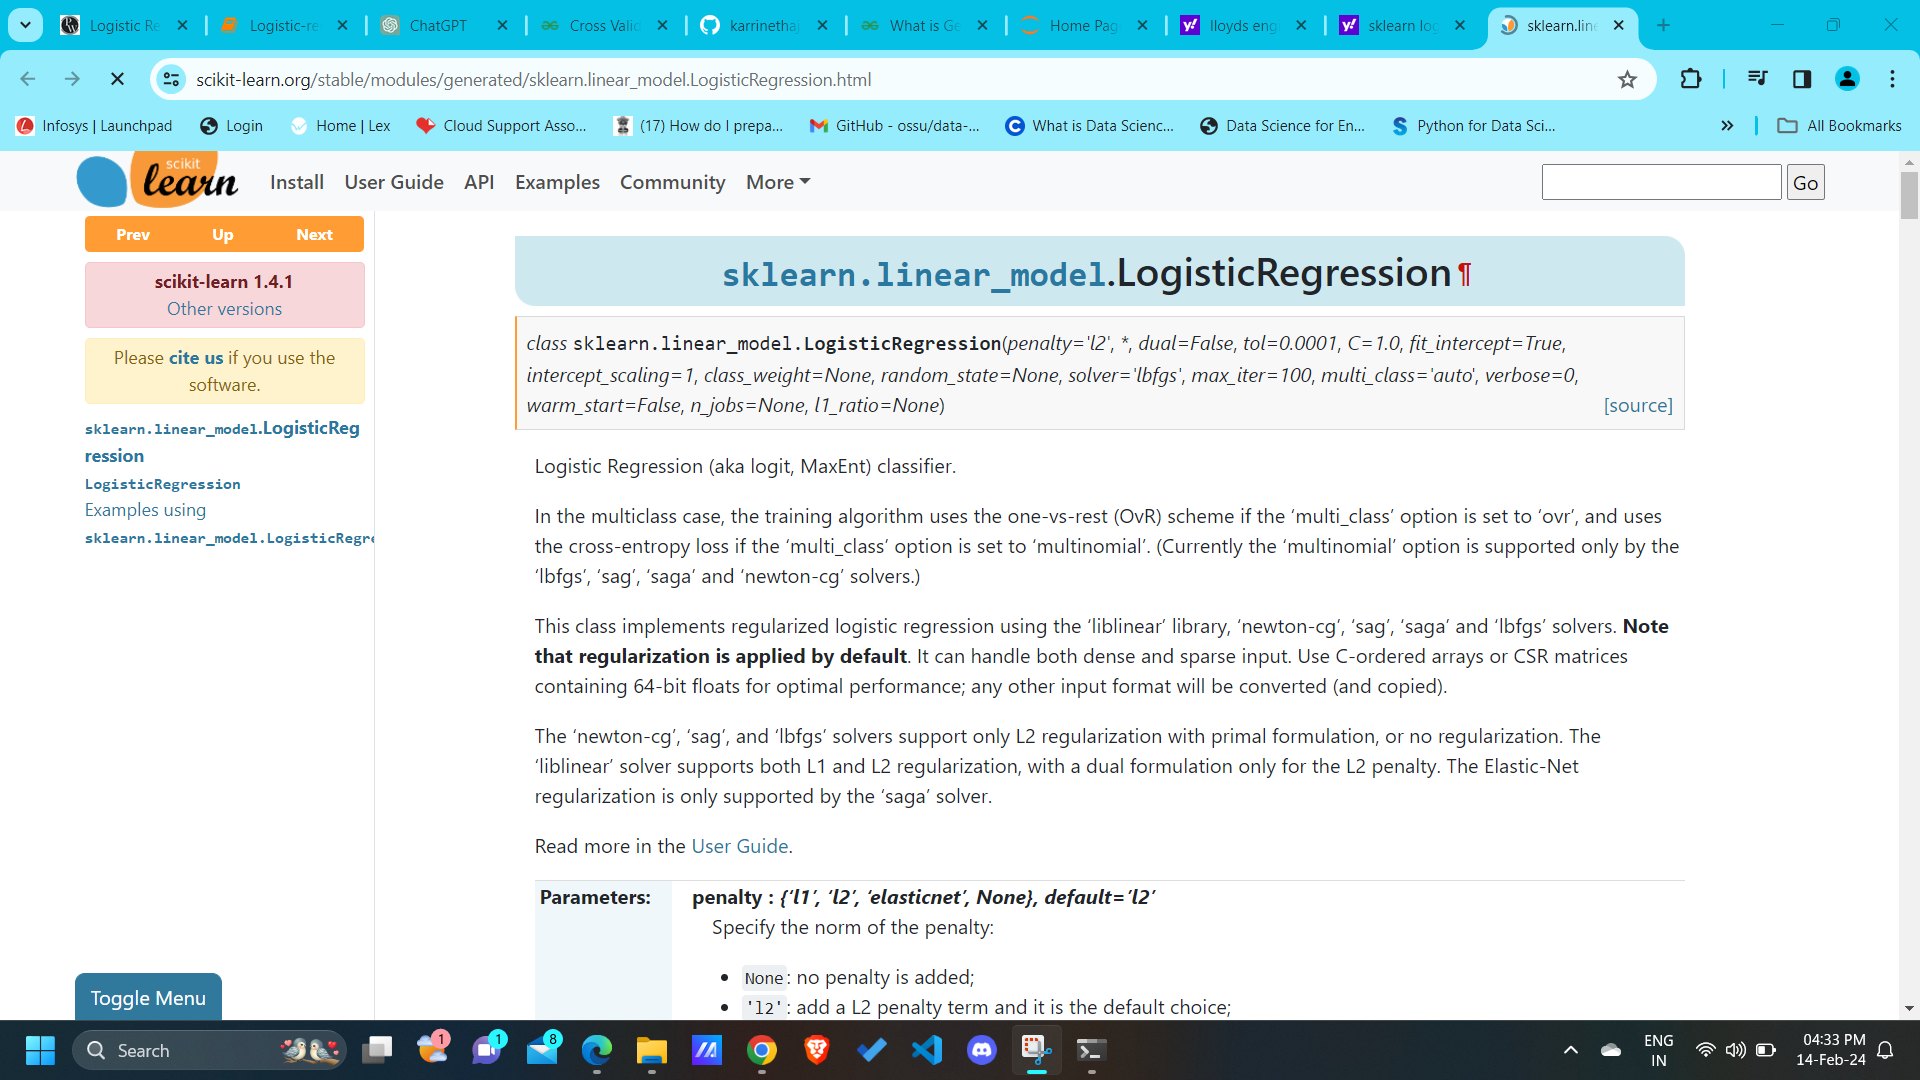

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
logistic_reg = LogisticRegression()

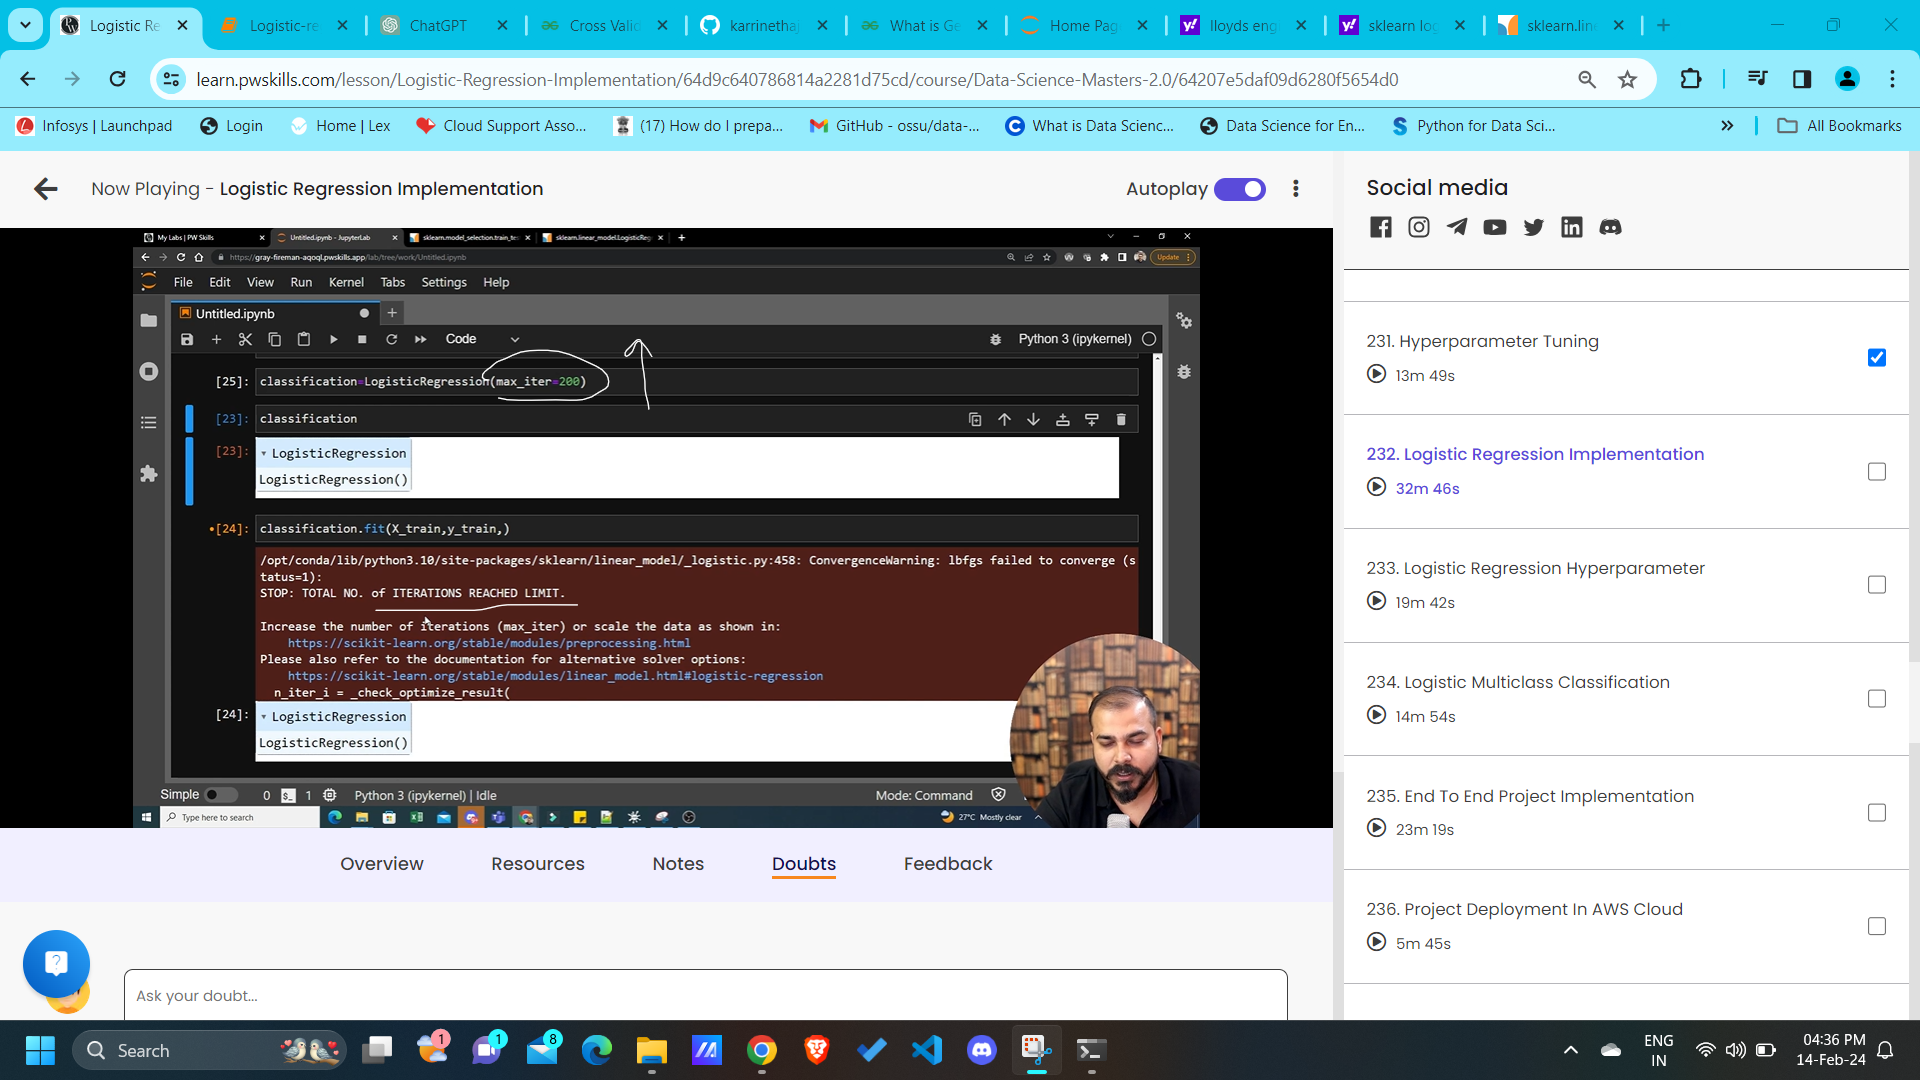

by default 

In [32]:
logistic_reg.fit(X_train,y_train)

LogisticRegression()

In [33]:
y_pred=logistic_reg.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred,y_test) # 100% accuracy it is something like overfitting

1.0

In [35]:
## Let's find the confusion matrix metrics

## Recall, Precision, Accuracy, F1-score

In [36]:
from sklearn.metrics import confusion_matrix, classification_report

In [37]:
confusion_matrix(y_pred,y_test)

array([[12,  0],
       [ 0,  8]], dtype=int64)

In [38]:
## True positive = 12
## True negative =8
# False positive and False negative are Zero ( that means model didn't predicted anything wrong)
# There is no TYPE-I ERROR and TYPE-II error

In [39]:
print(accuracy_score(y_pred,y_test)) # Accuracy from the confusion matrix

1.0


In [40]:
# Precision, recall, F1-score available in the classification report

print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [41]:
# As we don't have any FP, FN values we are getting everything as 100%

## Observations:

- After splitting train and test datasets using random_state value (In this case we took random_state=42) , we will get some amount of accuracy (in the above case we got 100% but in the practical cases, we got less accuracy)

- For every different value of random_state we will get different set of training and test dataset values ( I will perform the check below)

- For example if you get 60% accuracy when random_state=42 and if you change the random_state value then we will get the another set of accuracy

- But we can't manually change the random_state value in between the process, so we will use "Cross Validation technique"

In [42]:
### for random_state=42 we get the below train and test_dataset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [43]:
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
55,5.7,2.8,4.5,1.3
88,5.6,3.0,4.1,1.3
26,5.0,3.4,1.6,0.4
42,4.4,3.2,1.3,0.2
69,5.6,2.5,3.9,1.1


In [44]:
X_test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
83,6.0,2.7,5.1,1.6
53,5.5,2.3,4.0,1.3
70,5.9,3.2,4.8,1.8
45,4.8,3.0,1.4,0.3
44,5.1,3.8,1.9,0.4
39,5.1,3.4,1.5,0.2
22,4.6,3.6,1.0,0.2
80,5.5,2.4,3.8,1.1
10,5.4,3.7,1.5,0.2
0,5.1,3.5,1.4,0.2


In [45]:
### for random_state=102 we get the below train and test_dataset

from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=102)

In [46]:
X_train1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
1,4.9,3.0,1.4,0.2
62,6.0,2.2,4.0,1.0
5,5.4,3.9,1.7,0.4
41,4.5,2.3,1.3,0.3
19,5.1,3.8,1.5,0.3
...,...,...,...,...
72,6.3,2.5,4.9,1.5
73,6.1,2.8,4.7,1.2
66,5.6,3.0,4.5,1.5
78,6.0,2.9,4.5,1.5


In [47]:
X_test1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
98,5.1,2.5,3.0,1.1
46,5.1,3.8,1.6,0.2
97,6.2,2.9,4.3,1.3
21,5.1,3.7,1.5,0.4
44,5.1,3.8,1.9,0.4
33,5.5,4.2,1.4,0.2
75,6.6,3.0,4.4,1.4
65,6.7,3.1,4.4,1.4
83,6.0,2.7,5.1,1.6
15,5.7,4.4,1.5,0.4


## Observations:

- As you can see for change in random_state value, the datapoints under train and test datasets are changing.
- So every set of train and test datasets, we will get different type of accuracies
- We can't manually change the random_state value in between the ML algo, So to find the best training dataset/ hyperparameters which provide good accuracy to the new unseen data, we will use cross validation.

## Cross Validation:

- We use LogisticRegressionCV, GridSearchCV, RandomizedSearchCV for cross validation.***********
- In cross validation, Based on the cross validation value it will split the training data into validation dataset and training dataset
- Once the model trained on the training data, Internally it will find the accuracy using the validation data and stores the value internally
- The process is repeated based on cross validation value (cv) times
- For example, if process is repeated for 5 times, the test and train datasets values will be changed for all 5 iterations.
- For example, if process is repeated for 5 times, then we will get 5 accuracies and final aaccuracy will be average of the 5 accuracy
- Using cross validation, Whenever the cross validation alogorithm finds the best accuracy (among all) while training and validating then internally it will store the hyper-parameters ( these are the parameters used to train the model and after training, the trained ML model will be validated using the validation dataset ) which provides good accuracy, then we use same hyperparameters to train the original ML model (LogisticRegression)

## ChatGPT about Cross- Validation:

It seems like you're discussing various aspects of cross-validation, particularly in the context of machine learning models like Logistic Regression. Here's a summary of your points and some additional insights:

Cross-Validation Techniques: Cross-validation is a technique used to evaluate the performance of a machine learning model. Common methods include:

- LogisticRegressionCV: This is a specific implementation of cross-validation for logistic regression in scikit-learn, where the regularization parameter is automatically selected based on cross-validation scores.

- GridSearchCV: This technique exhaustively searches through a specified subset of hyperparameters for a model.

- RandomizedSearchCV: Similar to GridSearchCV, but it samples a specified number of candidates from a parameter space with a specified distribution.

Splitting Data: Cross-validation involves splitting the training data into multiple subsets. One subset is kept for validation, and the others are used for training. This process is repeated for each subset, ensuring that each data point is used for both training and validation.

Evaluating Model Performance: During each iteration of cross-validation, the model is trained on the training subset and evaluated on the validation subset. The performance metric, such as accuracy, is computed for each iteration.

Determining Final Performance: After all iterations are complete, the performance metric (e.g., accuracy) from each iteration is averaged to obtain a final estimate of the model's performance.

Selecting Hyperparameters: Cross-validation helps in selecting the best set of hyperparameters for the model. Hyperparameters are parameters that are set before the learning process begins (e.g., regularization strength in logistic regression). The combination of hyperparameters that yields the best performance on the validation sets is typically chosen.

Training the Final Model: Once the best hyperparameters are determined through cross-validation, they are used to train the final model on the entire training dataset. This final model can then be used for making predictions on new, unseen data.

Overall, cross-validation is a crucial technique for assessing and improving the performance of machine learning models, especially when it comes to selecting hyperparameters and avoiding overfitting.

In [48]:
## Refer the cross validation pdf for more understanding

## Practical Implementation of cross validation

In [49]:
### Let's use K-folds cross validation (Refer the cross validation pdf for more understanding)

In [50]:
from sklearn.model_selection import KFold

In [51]:
cv= KFold(n_splits=5,shuffle=False)

## Shuffle=True --> It will shuffle the data

In [52]:
cv

KFold(n_splits=5, random_state=None, shuffle=False)

In [53]:
cv.get_n_splits()

5

In [54]:
cv.shuffle

False

In [55]:
from sklearn.model_selection import cross_val_score

In [56]:
# cross_val_score(
#     estimator,
#     X,
#     y=None,
#     *,
#     groups=None,
#     scoring=None,
#     cv=None,
#     n_jobs=None,
#     verbose=0,
#     fit_params=None,
#     pre_dispatch='2*n_jobs',
#     error_score=nan,
# )
# Docstring:
# Evaluate a score by cross-validation.

In [57]:
cross_val_score(logistic_reg,X_train,y_train,scoring="accuracy",cv=cv) ## we are providing the logistic regression  model, 
# training data to split data into validation dataset
# for classification problem, we will use scoring="accuracy"
# cv=kFold cv object

# For every execution, the accuracy will change **
# Internally the X_train and y_train will be splitted into train+validation dataset
# Model (logistic_reg) will be trained with trained data (after seperating validation dataset from training data) and will find
# the accuracies
# The below are the accuracy scores for all the iterations

array([0.25  , 0.375 , 0.5625, 0.4375, 0.4375])

In [58]:
score= cross_val_score(logistic_reg,X_train,y_train,scoring="accuracy",cv=cv)

In [59]:
score

array([0.25  , 0.375 , 0.5625, 0.4375, 0.4375])

In [60]:
final_accuracy= sum(score)/len(score)

In [61]:
final_accuracy

0.4125

In [62]:
# or we can find mean

np.mean(score)

0.4125

In [63]:
## Lets see more complex data using make_classification module

# make a prediction with a multinomial logistic regression model

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, n_classes=2, random_state=1)

In [64]:
X

array([[ 2.56999479, -0.13019997,  3.16075093, ..., -1.93094078,
         3.26130366,  2.05692145],
       [ 0.34129317,  2.51321418, -0.80416572, ...,  6.24734437,
        -1.92769365,  2.9503149 ],
       [ 2.27539972,  3.36561455,  0.17164362, ...,  2.74693781,
         0.13492444,  2.00339547],
       ...,
       [ 0.5234359 ,  1.90466429,  0.93243365, ...,  1.53945231,
         1.90646166,  1.99458587],
       [ 1.33747921,  3.25859684,  0.78792366, ...,  5.18788314,
        -0.82071083,  3.51411431],
       [-0.98534299,  0.83919047,  2.5820803 , ...,  3.04705685,
         0.66885641,  3.32838496]])

In [65]:
y

array([1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,

In [66]:
pd.DataFrame(X) # For better visualization of data i have used dataframe object

,0,1,2,3,4,5,6,7,8,9
0,2.569995,-0.130200,3.160751,-4.359364,-1.612720,-1.393521,-2.489249,-1.930941,3.261304,2.056921
1,0.341293,2.513214,-0.804166,1.291966,2.057731,-3.110983,1.465830,6.247344,-1.927694,2.950315
2,2.275400,3.365615,0.171644,1.248620,0.302498,-1.137814,-1.608199,2.746938,0.134924,2.003395
3,0.357846,0.905176,-0.259241,0.930414,0.112336,0.143484,-0.367149,0.658955,-0.269128,0.155807
4,-2.722477,0.324236,2.906472,-0.021218,-2.867399,1.591744,0.620849,3.383528,0.945621,3.498071
...,...,...,...,...,...,...,...,...,...,...
995,-2.422590,2.119189,0.536083,2.009959,-0.939348,0.137236,1.978504,5.634054,-0.379776,3.134786
996,4.519803,-0.135669,-0.401285,-0.744954,1.747809,-0.786713,-3.916784,-3.668148,-0.717386,-1.905598
997,0.523436,1.904664,0.932434,-0.664534,-1.008471,-0.913046,-0.030649,1.539452,1.906462,1.994586
998,1.337479,3.258597,0.787924,1.423410,0.383229,-1.461592,-0.961593,5.187883,-0.820711,3.514114


In [67]:
# perform train test split

from sklearn.model_selection import train_test_split

X_train_complex, X_test_complex, y_train_complex, y_test_complex = train_test_split(X,y,test_size=0.20,random_state=42)

In [68]:
#Let's use logistic regression

In [69]:
complex_class_model= LogisticRegression(max_iter=200)

In [70]:
complex_class_model.fit(X_train_complex,y_train_complex)

LogisticRegression(max_iter=200)

In [71]:
y_pred_complex=complex_class_model.predict(X_test_complex)

In [72]:
accuracy_score(y_pred_complex,y_test_complex)

0.79

In [73]:
# Performance metrics

print(confusion_matrix(y_test_complex,y_pred_complex))
print(accuracy_score(y_test_complex,y_pred_complex))
print(classification_report(y_test_complex,y_pred_complex))

[[78 13]
 [29 80]]
0.79
              precision    recall  f1-score   support

           0       0.73      0.86      0.79        91
           1       0.86      0.73      0.79       109

    accuracy                           0.79       200
   macro avg       0.79      0.80      0.79       200
weighted avg       0.80      0.79      0.79       200



In [74]:
## we are getting 0.79 accuracy without doing cross validation

# Let's do cross validation

cv_kfold= KFold(n_splits=5,shuffle=True)

In [75]:
cv_kfold

KFold(n_splits=5, random_state=None, shuffle=True)

In [76]:
from sklearn.model_selection import cross_val_score

cross_val_score(complex_class_model,X_train_complex,y_train_complex,scoring="accuracy",cv=cv_kfold)

array([0.7875 , 0.80625, 0.8    , 0.8125 , 0.85   ])

In [77]:
score= cross_val_score(complex_class_model,X_train_complex,y_train_complex,scoring="accuracy",cv=cv_kfold)

In [78]:
score

array([0.81875, 0.8125 , 0.78125, 0.7875 , 0.8625 ])

In [79]:
final_accuracy= np.mean(score)

In [80]:
final_accuracy # As compared to earlier, we got good accuracy after performing cross validation

0.8125

In [81]:
#<--------------------------- Let's discuss hyperparameter tuning in the next notebook ---------------------------------->